The Monty Hall Problem has been living in my head rent-free since I saw the movie "21". The problem is famous and quickly stated:

In a gameshow there is one contestant and three doors. Behind one of the doors is a prize (a car), behind the two other is no prize (a goat). The contestant can choose any door. After the contestant chooses their door, the gameshow host, knowing where the goats are, opens one of the two doors not picked by the contestant and reveals a goat. The contestant is then asked if they want to switch the door, or stay with their original pick?

Intuitively, it does not matter if one switches or not, but this would not be a very entertaining problem if that was the case. In reality it matters and this can be shown. One way of showing is is by running thousands of simulations, which I will do in a moment. 

For now let's assume the contestant picked door No. 1. Now the odds of having picked a goat are 2 to 1. Meaning if the game master opens a door with a goat, and asks if one wants to change the door,  the following consideration matters: If one had a goat (2 to 1 odds), switching is guaranteed to end up on a car. Suddenly the probability of having picked a goat in round one (2 to 1) is the probability of winning. So switching is mandatory.

Do check out the full [Wikipedia page](https://en.wikipedia.org/wiki/Monty_Hall_problem) to see nice diagrams and find better worded explanations. Stick around for a simulation that shows this counterintuitive result.


## Simulating the Monty Hall Problem

To simulate the Monty Hall problem I am using Python, but of course R or Julia would also have been excellent choices. 

I am setting up a function that simulates the game show `n` times. The contestant either changes doors or sticks to the original plan.

In [1]:
import random

import pandas as pd
import plotnine as p9


def open_doors(n: int = 100, change_doors: bool = False) -> float:
    outcomes = []

    for _ in range(n):
        doors = ["car", "goat", "goat"]
        random.shuffle(doors)

        # What door do you think the prize is behind.
        # Choose now and choose well
        contestant_pick_1 = random.randint(0, 2)

        # Oh, nice pick. But are you sure?
        # Look there is a goat behind this door:
        # [opens door not picked by contestant that has a goat behind it]
        _goat_doors = [i for i in range(3) if doors[i] == "goat"]
        _open_door_nr = random.choice(
            [p for p in _goat_doors if p != contestant_pick_1]
        )
        assert doors[_open_door_nr] == "goat"
        doors[_open_door_nr] = "open"

        _remaining_doors = [i for i in range(3) if doors[i] != "open"]
        assert len(_remaining_doors) == 2
        assert sum([doors[i] == "car" for i in _remaining_doors]) == 1

        # Do you want to change your answer? Maybe you choose wrong?
        if change_doors:
            # Yes I will switch
            contestant_pick_2 = [
                i for i in _remaining_doors if i != contestant_pick_1
            ][0]
        else:
            # No, I won't switch, I stick to my original door
            contestant_pick_2 = contestant_pick_1

        # I check if the simulation "won"
        outcome = doors[contestant_pick_2] == "car"
        outcomes.append(outcome)

    return sum(outcomes) / len(outcomes)

Now, I can run this function once or many times. I think it becomes more intuitive if we run it a few times. 

Let's say the game show runs 10 seasons, and each season has 52 episodes. So its weekly for 10 years. I can simulate each season separately. I assume all candidates either switch or do not switch over all 10 years.

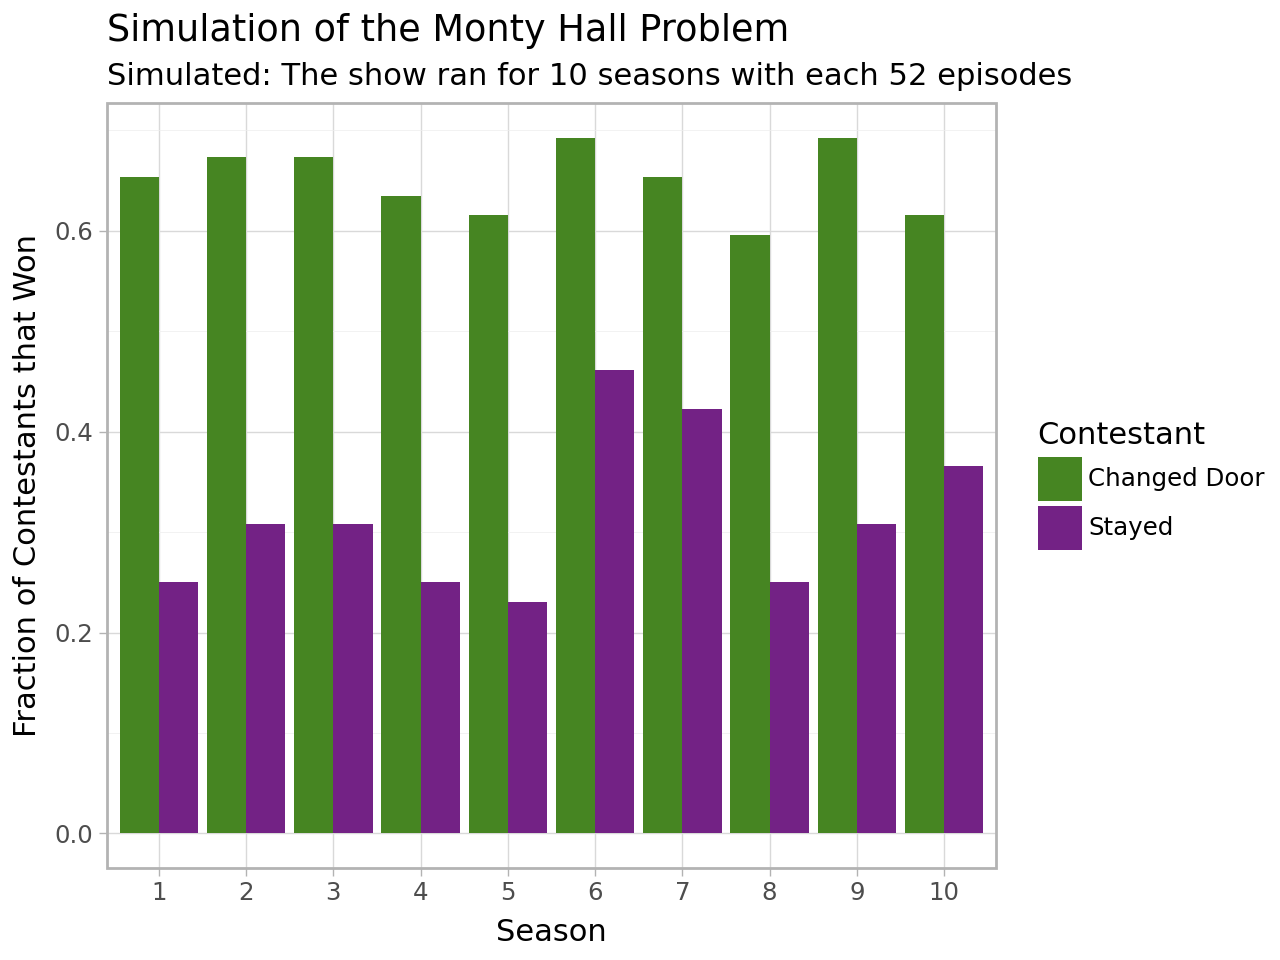

In [2]:
def simulate_n_seasons(seasons: int = 10, episodes: int = 52):
    results = []
    for season in range(1, seasons + 1):
        results.append(
            {
                "p": open_doors(n=episodes, change_doors=False),
                "Contestant": "Stayed",
                "Season": str(season),
            }
        )

    for season in range(1, seasons + 1):
        results.append(
            {
                "p": open_doors(n=episodes, change_doors=True),
                "Contestant": "Changed Door",
                "Season": str(season),
            }
        )

    df = pd.DataFrame(results)
    df["Season"] = pd.Categorical(
        df["Season"],
        categories=[str(i) for i in range(1, seasons + 1)],
        ordered=True,
    )

    return (
        p9.ggplot(df, p9.aes(y="p", x="Season", fill="Contestant"))
        + p9.geom_col(position="dodge")
        + p9.theme_light()
        + p9.labs(
            title="Simulation of the Monty Hall Problem",
            x="Season",
            y="Fraction of Contestants that Won",
            subtitle=f"Simulated: The show ran for {seasons} seasons with each {episodes} episodes",
        )
        + p9.scale_fill_manual(
            values={
                "Stayed": "#732285",
                "Changed Door": "#468522",
            }
        )
    )


simulate_n_seasons(seasons=10, episodes=52)

This becomes more stable if I simulate one show each day, what a popular game show it was!

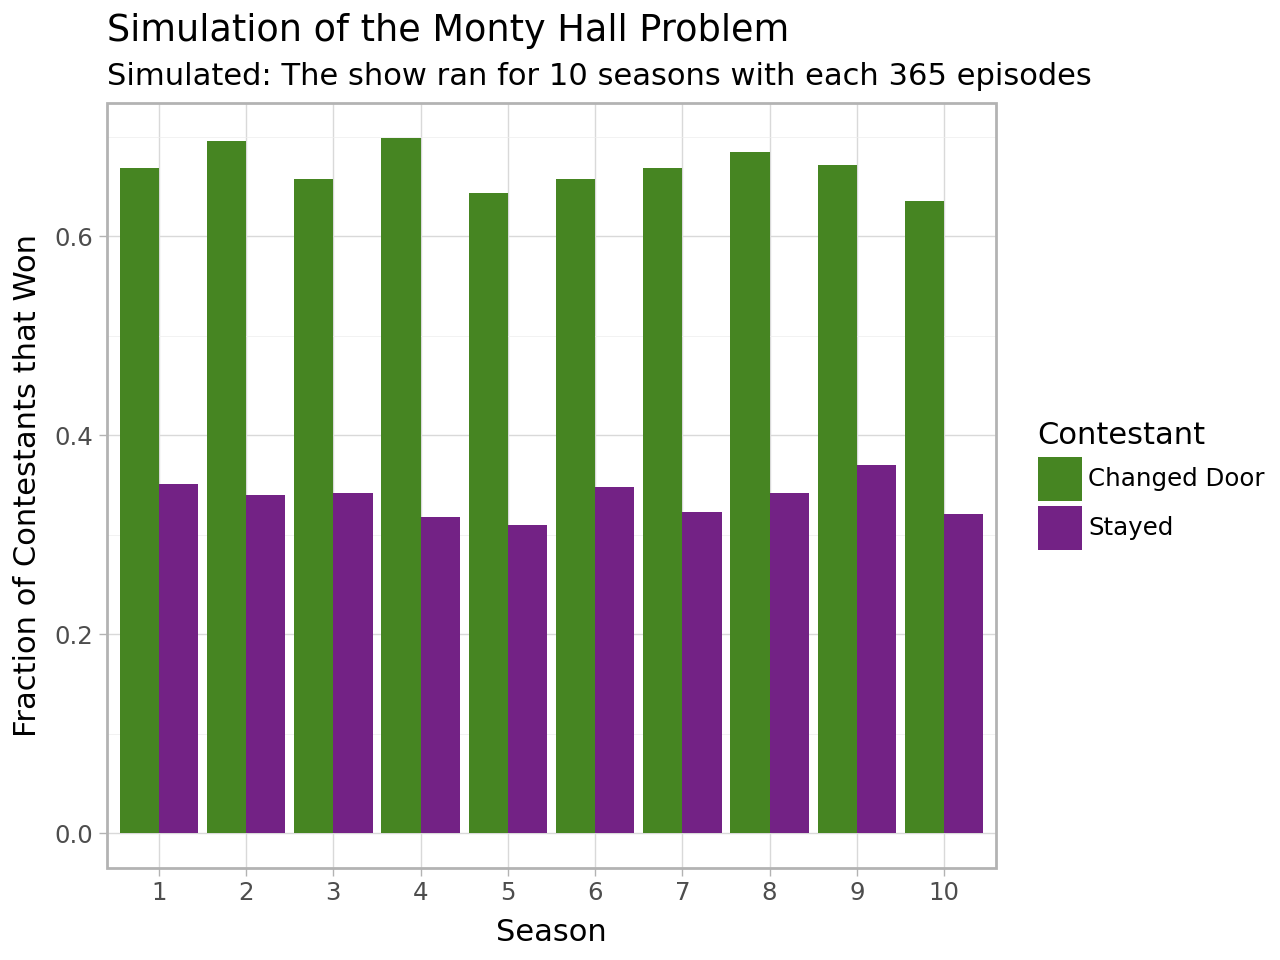

In [3]:
simulate_n_seasons(seasons=10, episodes=365)

And even more stable if I simulate 100.000 shows each season:

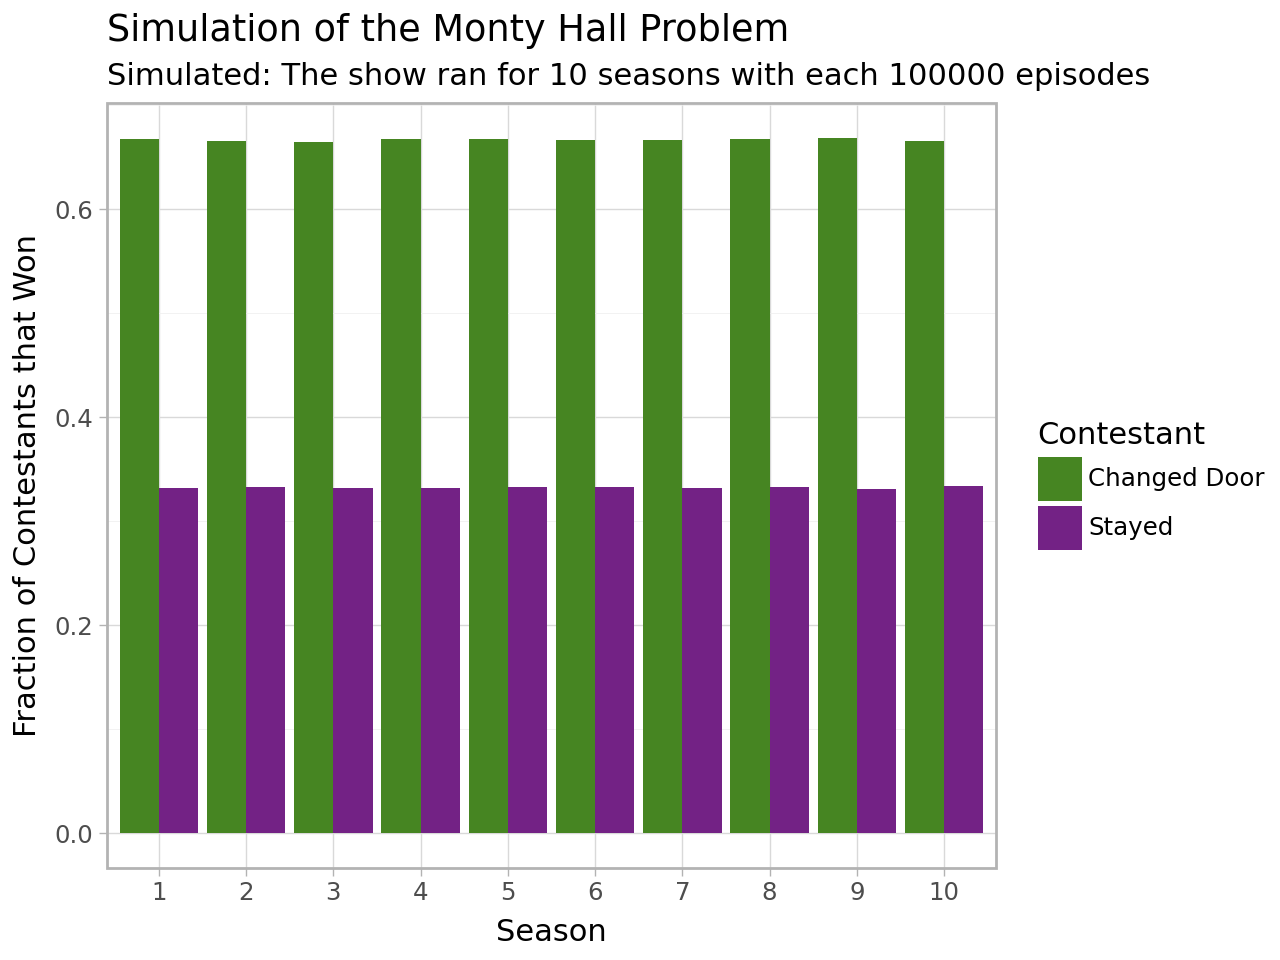

In [4]:
simulate_n_seasons(seasons=10, episodes=100000)

Now it is really clearly visible: In the long run, changing the door has a winning probability of 66.6% while one wins only in 33.3% of games if one stays with the original door. 

Wild.

I think this is a nice brain teaser that dips into conditional probability. I enjoyed using numerical simulations to breathe life into this very abstract mathematical problem. 

Until next time. 